In [192]:
import pandas as pd
import numpy as np
# import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [193]:
def readVisitCSV(fn):
    df = pd.read_csv(fn)
    df['Date'] = pd.to_datetime(df['Date'])
    return df

def logFitFn(x, a, b):
    return a*np.log(x)+b

def polyFnOrd2(x, a, b, c):
    return a*x**2 + b*x + c

def polyFnOrd3(x, a, b, c, d):
    return a*x**3 + b*x**2 + c*x + d

def polyFnOrd4(x, a, b, c, d, f):
    return a*x**4 + b*x**3 + c*x**2 + d*x + f

<AxesSubplot:title={'center':'COVID-19 Screening Visits 2020'}, xlabel='Date', ylabel='Visit Count'>

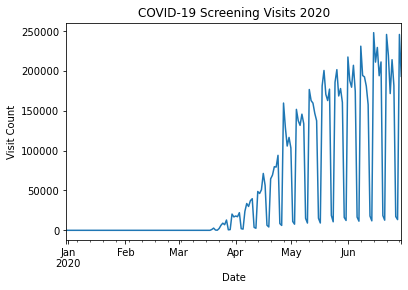

In [194]:
screenDf = readVisitCSV('screening_data.csv')
screenDf.plot(
    x='Date',
    y='Counts',
    legend=False,
    ylabel='Visit Count',
    title="COVID-19 Screening Visits 2020"
)



<AxesSubplot:title={'center':'Total Clinical Visits 2020'}, xlabel='Date', ylabel='Visit Count'>

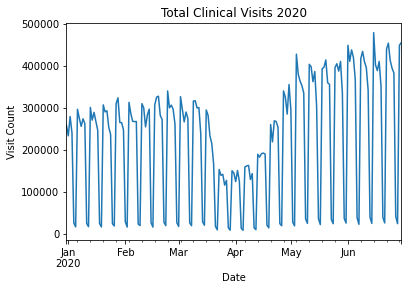

In [195]:
visitDf = readVisitCSV('visit_data.csv')
visitDf.plot(
    x='Date',
    y='Counts',
    legend=False,
    ylabel='Visit Count',
    title="Total Clinical Visits 2020"
)



<AxesSubplot:title={'center':'Rate of Screening Visits to Total Visits 2020'}, xlabel='Date', ylabel='Counts'>

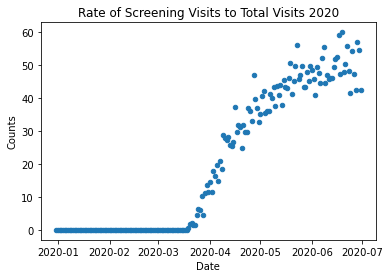

In [196]:
screenToVisitDf = screenDf.copy()
screenToVisitDf['Counts'] = screenDf['Counts']*100/visitDf['Counts']
screenToVisitDf.plot(
    x='Date',
    y='Counts',
    kind='scatter',
    legend=False,
    ylabel='% Screening Visits',
    title="Rate of Screening Visits to Total Visits 2020"
)

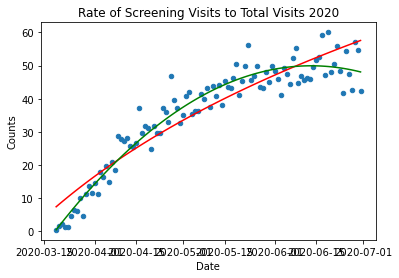

In [197]:
cleanedScreenRatioDf = screenToVisitDf[screenToVisitDf.Counts != 0]
xDate = cleanedScreenRatioDf['Date']
x = cleanedScreenRatioDf.index
y = cleanedScreenRatioDf['Counts']
popt, pcov = curve_fit(logFitFn, x, y)
perr = np.sqrt(np.diag(pcov))
yLogFit = logFitFn(x, *popt)

poly_popt, poly_pcov = curve_fit(polyFnOrd2, x, y)
yPolyFit = polyFnOrd2(x, *poly_popt)

screeningPlot = cleanedScreenRatioDf.plot(
    x='Date',
    y='Counts',
    kind='scatter',
    legend=False,
    ylabel='% Screening Visits',
    title="Rate of Screening Visits to Total Visits 2020"
)
screeningPlot.plot(
    xDate,
    yLogFit,
    color='red'
)
screeningPlot.plot(
    xDate,
    yPolyFit,
    color='green'
)

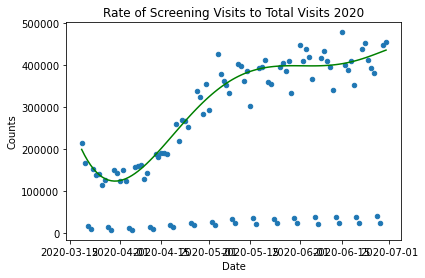

In [198]:
cleanedVisitDf = visitDf.loc[cleanedScreenRatioDf.index]
weekdayVisitDf = cleanedVisitDf.loc[cleanedVisitDf['Date'].dt.dayofweek.lt(5)]

x = weekdayVisitDf.index
y = weekdayVisitDf['Counts']
wkDay_popt, wkDay_pcov = curve_fit(polyFnOrd4, x, y)

poly = np.polyfit(x, y, 6)

yWkDayFit = np.polyval(poly, cleanedVisitDf.index)
visitPlot = cleanedVisitDf.plot(
    x='Date',
    y='Counts',
    kind='scatter',
    legend=False,
    ylabel='% Screening Visits',
    title="Rate of Screening Visits to Total Visits 2020"
)

visitPlot.plot(
    cleanedVisitDf['Date'],
    yWkDayFit,
    color='green'
)


In [ ]:
finalFit = yWkDayFit*yPolyFit